In [2]:
# Import libraries
import os
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from glob import glob

## Checking the values of the probability map

In [3]:
images = glob('../prob_masks/*')
print(images)

['../prob_masks/105_6_0038.jpg', '../prob_masks/105_11_0117.png', '../prob_masks/114_7_0076.png', '../prob_masks/114_7_0078.png', '../prob_masks/105_11_0076.png', '../prob_masks/113_21_0057.png', '../prob_masks/94_20_0059.jpg', '../prob_masks/95_32_0051.jpg', '../prob_masks/114_7_0077.png', '../prob_masks/105_11_0105.png', '../prob_masks/105_11_0077.png', '../prob_masks/94_20_0082.jpg', '../prob_masks/105_6_0052.jpg', '../prob_masks/105_11_0103.png', '../prob_masks/105_11_0099.png']


In [9]:
# Create the directory for the outputs
path = "../../Outputs/Plots/p_mask_verification/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory ../../Outputs/Plots/p_mask_verification/ failed


../prob_masks/105_6_0038.jpg
105_6_0038
../prob_masks/105_11_0117.png
105_11_0117
../prob_masks/114_7_0076.png
114_7_0076
../prob_masks/114_7_0078.png
114_7_0078
../prob_masks/105_11_0076.png
105_11_0076
../prob_masks/113_21_0057.png
113_21_0057
../prob_masks/94_20_0059.jpg
94_20_0059
../prob_masks/95_32_0051.jpg
95_32_0051


/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

../prob_masks/114_7_0077.png
114_7_0077
../prob_masks/105_11_0105.png


/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

105_11_0105
../prob_masks/105_11_0077.png
105_11_0077
../prob_masks/94_20_0082.jpg
94_20_0082


/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.

../prob_masks/105_6_0052.jpg
105_6_0052
../prob_masks/105_11_0103.png
105_11_0103


/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/home/nate/anaconda3/envs/sberbank/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.

../prob_masks/105_11_0099.png
105_11_0099


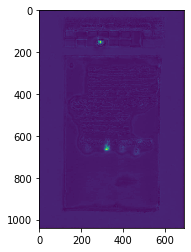

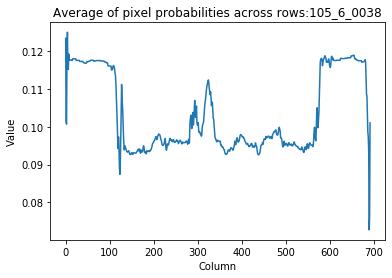

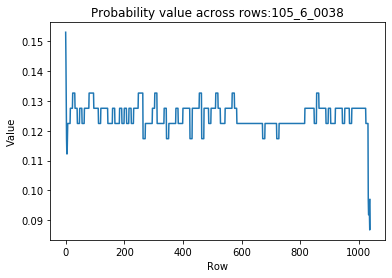

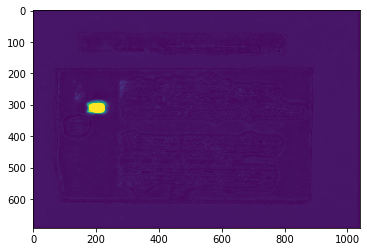

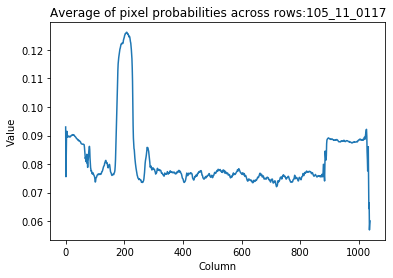

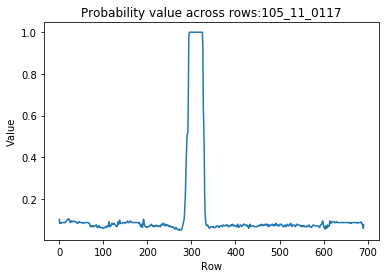

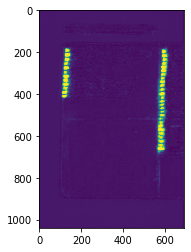

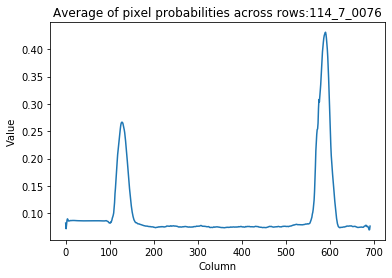

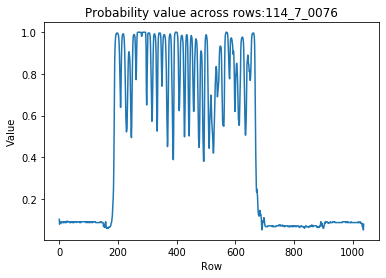

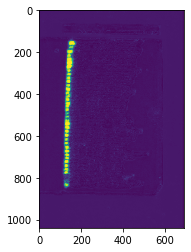

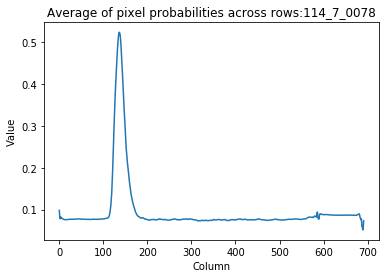

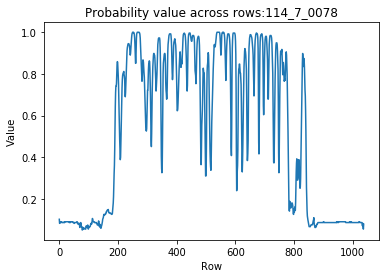

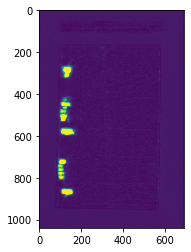

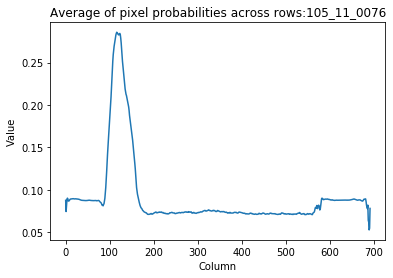

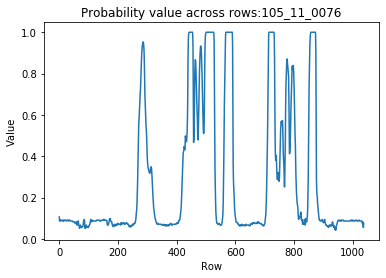

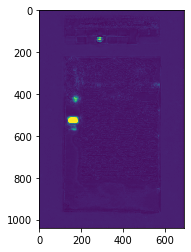

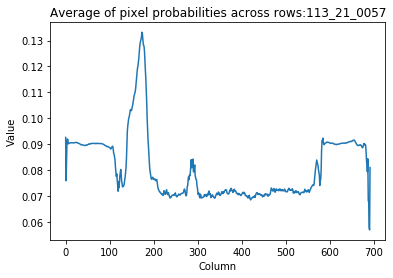

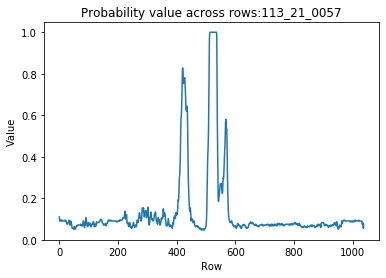

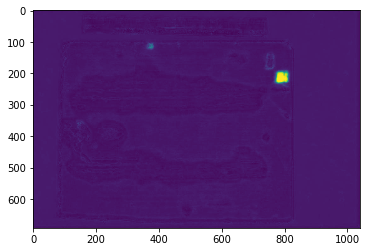

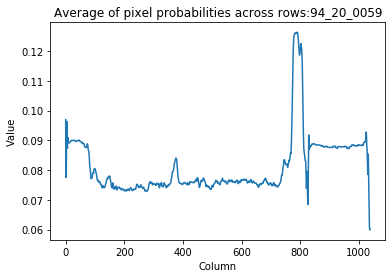

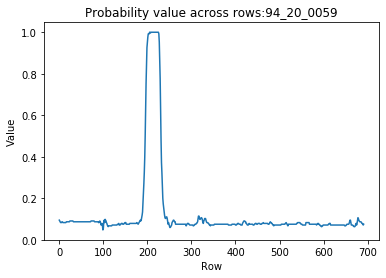

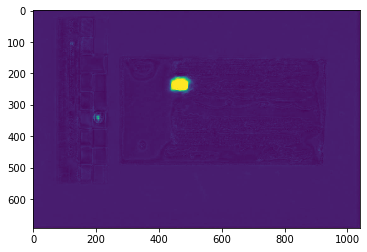

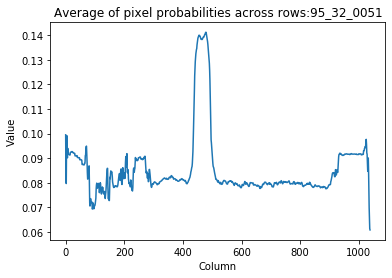

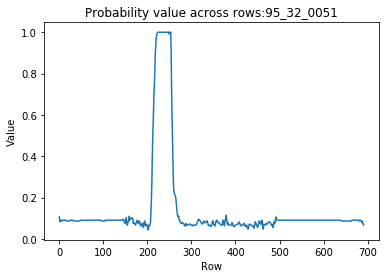

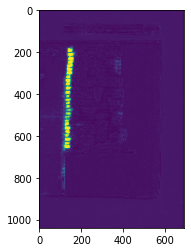

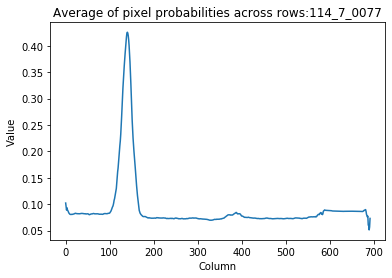

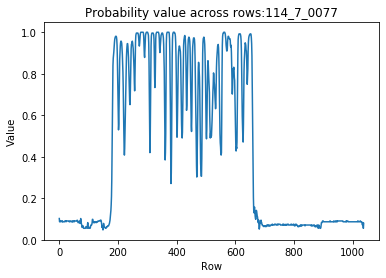

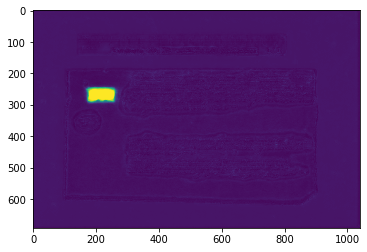

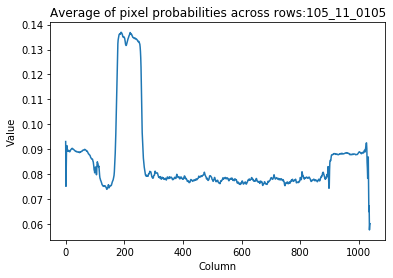

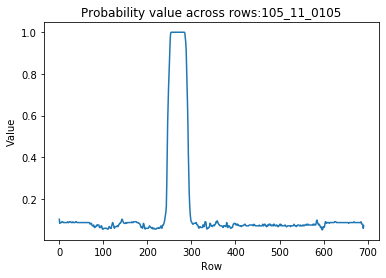

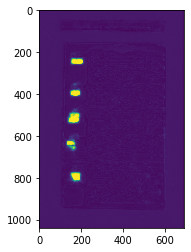

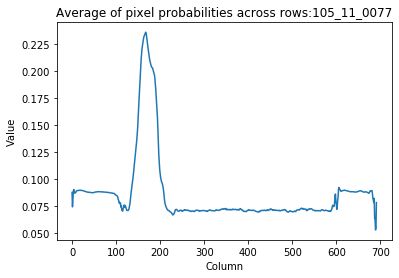

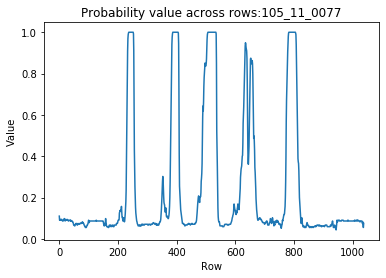

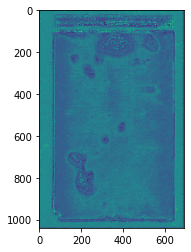

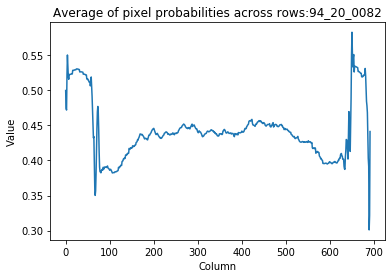

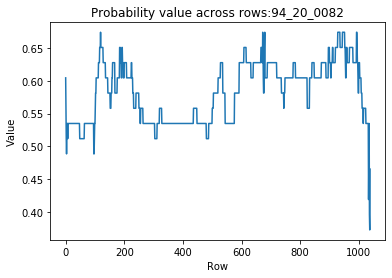

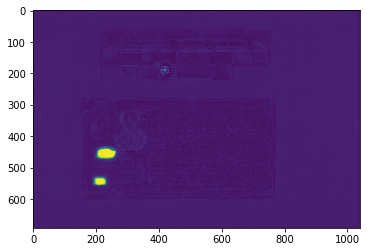

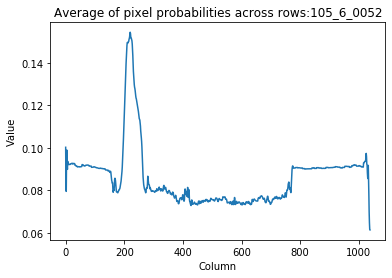

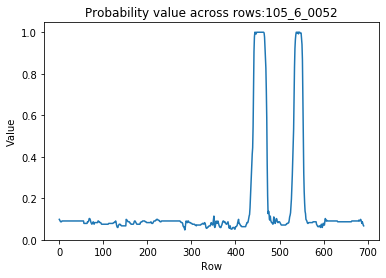

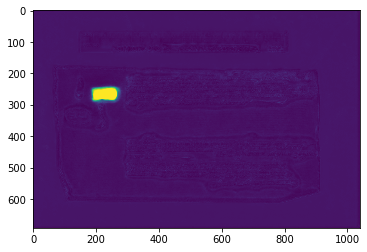

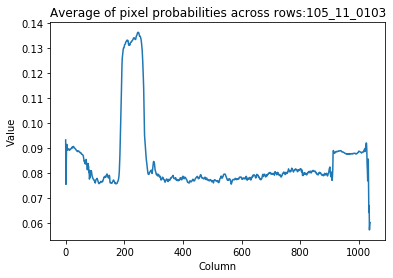

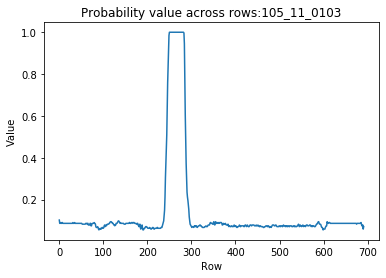

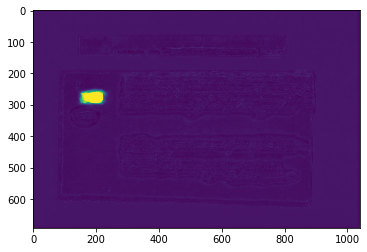

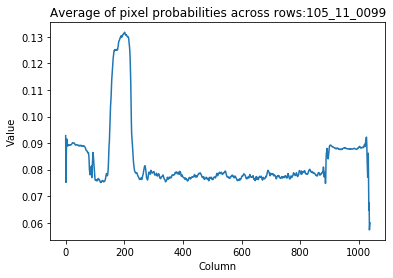

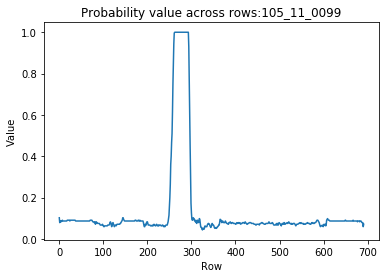

In [12]:
# To find the column of marks we create a projection signature in the column direction

for file in images:
    
    # Load the image
    print(file)
    name = file[14:-4]
    image = cv2.imread(file,0)
    image = image/np.max(image)
    plt.figure()
    plt.imshow(image)

    hor_sig = np.mean(image, axis=0)

    plt.figure()
    plt.plot(hor_sig)
    plt.ylabel('Value')
    plt.xlabel('Column')
    plt.title('Average of pixel probabilities across rows:' + name)
    plt.savefig(path + name + 'av.svg')

    # Find the max value, which will correspond to the marks
    max_element = np.amax(hor_sig)
    max_index = np.where(hor_sig == max_element)

    # After we create looks at the projection signature in the row direction
    ver_sig = image[:,max_index[0]]

    plt.figure()
    plt.plot(ver_sig)
    plt.ylabel('Value')
    plt.xlabel('Row')
    plt.title('Probability value across rows:' + name)
    plt.savefig(path + name + 'pb.svg')